<a href="https://colab.research.google.com/github/SabeehAnsari/Pytorch-Image-classifier/blob/main/Clustering_Experiment_Redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy scipy matplotlib scikit-learn

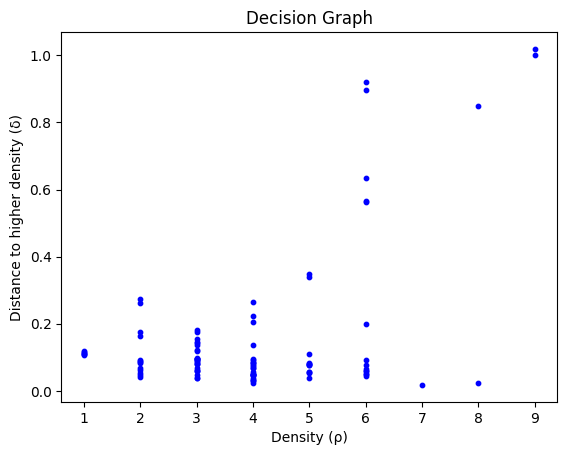

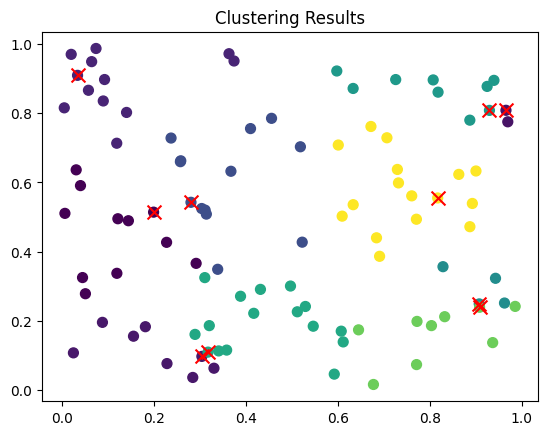

Silhouette Score: 0.25228871229874444
Davies-Bouldin Index: 0.9106530040120058


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def compute_density(points, dc):
    # Compute the local density for each point
    distances = cdist(points, points)
    density = np.sum(distances < dc, axis=1)
    return density

def compute_distance_to_higher_density(points, density):
    # Compute the distance to the nearest point of higher density
    distances = cdist(points, points)
    di = np.max(distances, axis=1)  # Initialize with maximum distance
    for i in range(len(points)):
        higher_density_points = np.where(density > density[i])[0]
        if len(higher_density_points) > 0:
            di[i] = np.min(distances[i, higher_density_points])
    return di

def density_peaks_clustering(points, dc):
    density = compute_density(points, dc)
    distance_to_higher_density = compute_distance_to_higher_density(points, density)

    # Decision graph (di vs density)
    plt.scatter(density, distance_to_higher_density, s=10, color='blue')
    plt.xlabel('Density (ρ)')
    plt.ylabel('Distance to higher density (δ)')
    plt.title('Decision Graph')
    plt.show()

    # Identify cluster centers (points with high density and high di)
    cluster_centers = []
    for i in range(len(points)):
        if distance_to_higher_density[i] > np.percentile(distance_to_higher_density, 90):
            cluster_centers.append(i)

    # Assign points to clusters based on the nearest cluster center
    cluster_assignments = np.zeros(len(points))
    for i in range(len(points)):
        distances_to_centers = cdist([points[i]], points[cluster_centers])
        cluster_assignments[i] = cluster_centers[np.argmin(distances_to_centers)]

    return cluster_centers, cluster_assignments

# Generate synthetic data (for demonstration)
np.random.seed(42)
points = np.random.rand(100, 2)  # 100 points in 2D space

# Set the cutoff distance (dc)
dc = 0.1

# Run the clustering algorithm
cluster_centers, cluster_assignments = density_peaks_clustering(points, dc)

# Visualize the clusters
plt.scatter(points[:, 0], points[:, 1], c=cluster_assignments, cmap='viridis', s=50)
plt.scatter(points[cluster_centers, 0], points[cluster_centers, 1], color='red', marker='x', s=100)
plt.title('Clustering Results')
plt.show()


from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming cluster_assignments contains your clustering results
# and points contains your data points

# Compute Silhouette Score
silhouette_avg = silhouette_score(points, cluster_assignments)
print(f'Silhouette Score: {silhouette_avg}')

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(points, cluster_assignments)
print(f'Davies-Bouldin Index: {db_index}')



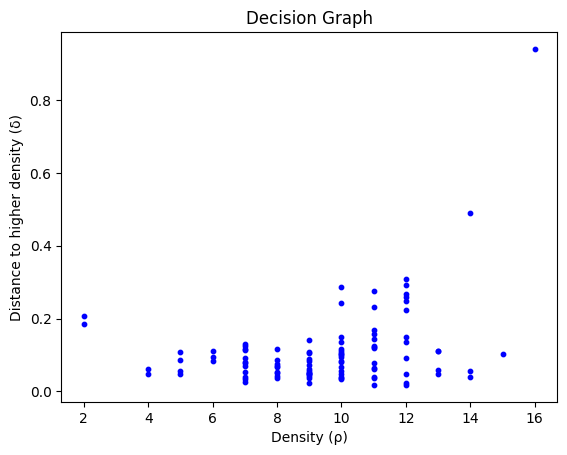

Results for dc = 0.18
Silhouette Score: 0.19872687019119184
Davies-Bouldin Index: 1.0211424082782892
--------------------------------------------------


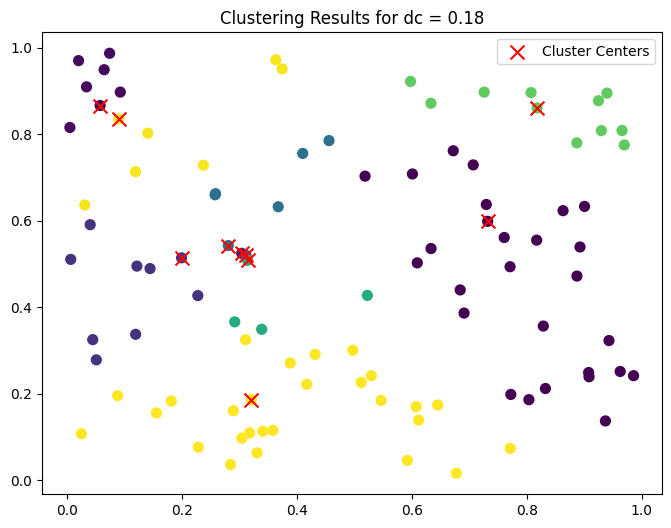

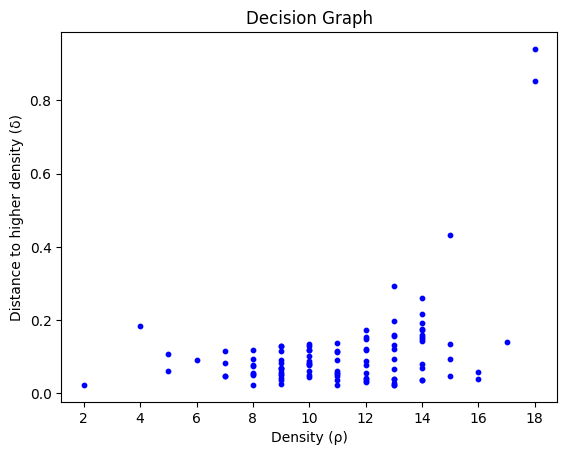

Results for dc = 0.2
Silhouette Score: 0.3280316943440078
Davies-Bouldin Index: 0.8942828138039847
--------------------------------------------------


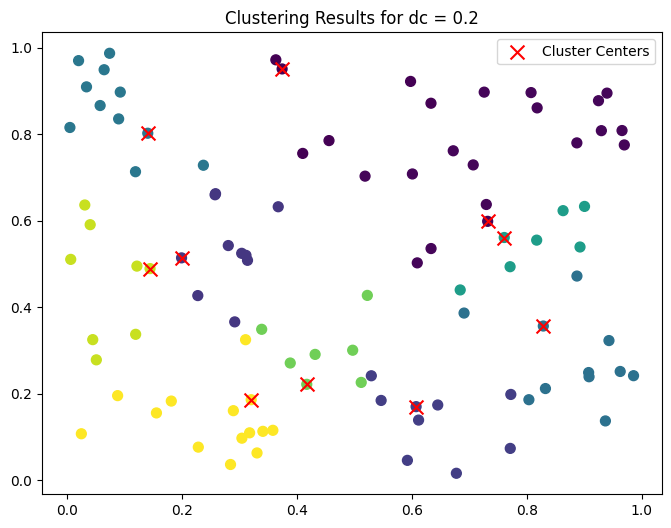

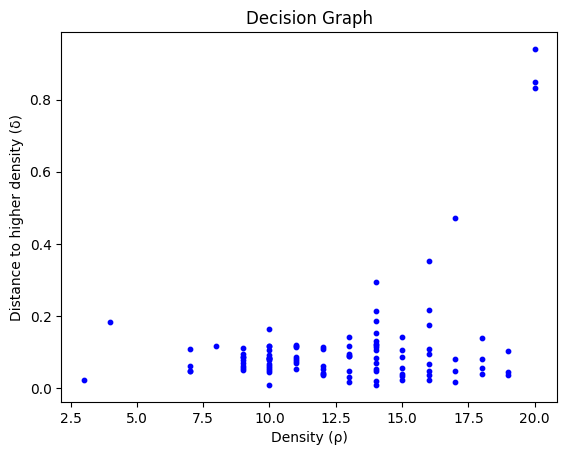

Results for dc = 0.22
Silhouette Score: 0.3121384654400629
Davies-Bouldin Index: 1.0419900466799903
--------------------------------------------------


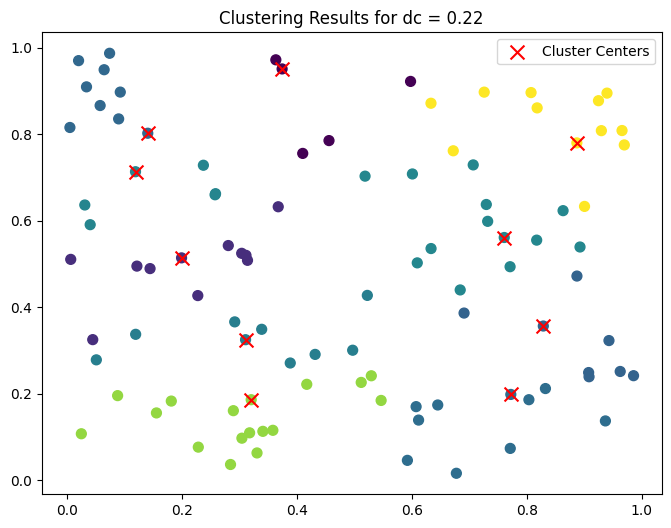

In [4]:
# Fine-tuning dc around 0.2
dc_values = [0.18, 0.2, 0.22]  # Experimenting with values near 0.2

for dc in dc_values:
    # Run the clustering with the current value of dc
    cluster_centers, cluster_assignments = density_peaks_clustering(points, dc)

    # Compute Silhouette Score and Davies-Bouldin Index for the current clustering
    silhouette_avg = silhouette_score(points, cluster_assignments)
    db_index = davies_bouldin_score(points, cluster_assignments)

    # Display the results
    print(f"Results for dc = {dc}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {db_index}")
    print("-" * 50)

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], c=cluster_assignments, cmap='viridis', s=50)
    plt.scatter(points[cluster_centers, 0], points[cluster_centers, 1], color='red', marker='x', s=100, label='Cluster Centers')
    plt.title(f"Clustering Results for dc = {dc}")
    plt.legend()
    plt.show()
